# 6. Пространственные методы обработки изображений

In [315]:
import cv2
import numpy as np
import random
from matplotlib import pyplot as plt

In [316]:
# функция ввода изображения
def img_input(img_path, size=(0,0), type=1):
    img = cv2.imread(img_path,type)
    if type == 1:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        if size != (0,0):
            img = cv2.resize(img, size)
            return img
        else:
            return img
    else:
        if size != (0,0):
            img = cv2.resize(img, size)
            return img
        else:
            return img

# функция вывода изображения
def img_print(images, titles, row_and_colm=(0,0), hard_type='None'):
    num_of_img = len(images)
    if hard_type == 'None':
        for i in range(num_of_img):
            if row_and_colm == (0,0):
                plt.subplot(1,num_of_img,i+1),plt.imshow(images[i])
                plt.title(titles[i])
                plt.xticks([]),plt.yticks([])
            else:
                plt.subplot(row_and_colm[0],row_and_colm[1],i+1),plt.imshow(images[i])
                plt.title(titles[i])
                plt.xticks([]),plt.yticks([])
        plt.show ()

    else:
        for i in range(num_of_img):
            if row_and_colm == (0,0):
                plt.subplot(1,num_of_img,i+1),plt.imshow(images[i], hard_type)
                plt.title(titles[i])
                plt.xticks([]),plt.yticks([])
            else:
                plt.subplot(row_and_colm[0],row_and_colm[1],i+1),plt.imshow(images[i], hard_type)
                plt.title(titles[i])
                plt.xticks([]),plt.yticks([])
        plt.show ()

##  6.2. Зашумление изображений

Создаем функцию с параметрами (<наше изображение>, <вероятность зашумления>), создаем массив нулей такого же размера и формата как исходное изображение, задаем порог, Пробегаем все столбцы и для каждого из них пробегаем все строки, задаем случайное число от 0 до 1, Если это случайное число выпало больше нашего порога задаем пикселю случайное значение из кортежа Иначе оставляем пиксель без изменения и возвращаем получившееся изображение

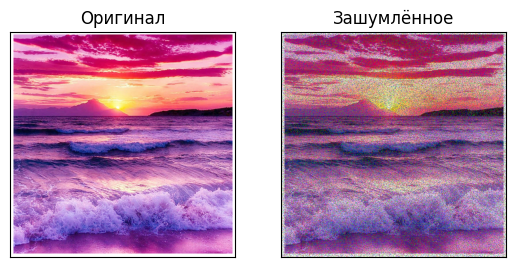

In [317]:
# Создаем 3 возможных цвета - красный, зеленый и синий
red, green, blue = (255, 0, 0), (0, 255, 0), (0, 0,255)
# Помещаем их в кортеж
rgb = [red, green, blue]

def sp_noise(image,prob):
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn > thres:
                output[i][j] = random.choice(rgb)
            else:
                output[i][j] = image[i][j]

    return output

image = img_input('img/sunset.jpeg',size=(1001,1001))
noise_img = sp_noise(image,0.3)

title = ['Оригинал', 'Зашумлённое']
res = [image, noise_img]

img_print(res, title)

## 6.3. Сглаживание изображений

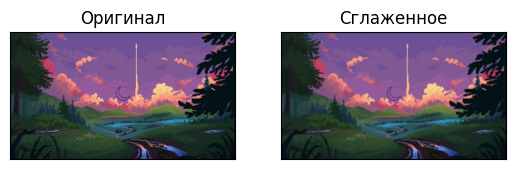

In [318]:
image = img_input('img/pixel_art_1.jpg',size=(1280,720))

kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(image,-1,kernel)

title = ['Оригинал', 'Сглаженное']
res = [image, dst]

img_print(res, title)

## 6.4. Усреднение

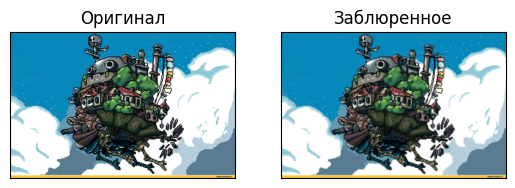

In [319]:
image = img_input('img/pixel_art_2.jpeg')

blur = cv2.blur(image,(5,5))

title = ['Оригинал', 'Заблюренное']
res = [image, blur]

img_print(res, title)

## 6.5. Гауссова фильтрация

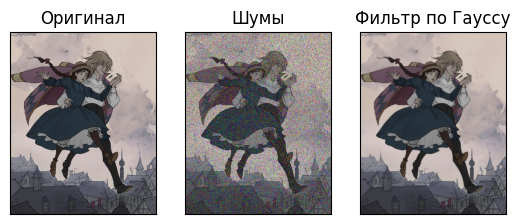

In [320]:
image = img_input('img/art_3.jpg')


mash =sp_noise(image, 0.3)
blur = cv2.GaussianBlur(image,(5,5), 0)


title = ['Оригинал', 'Шумы', 'Фильтр по Гауссу']
res = [image, mash, blur]

img_print(res, title)

## Медианная фильтрация

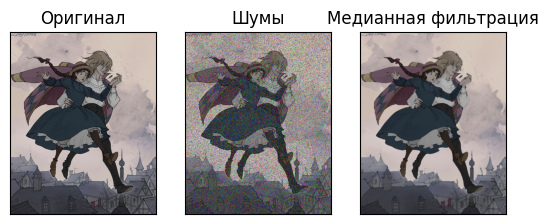

In [321]:
image = img_input('img/art_3.jpg')


mash =sp_noise(image, 0.3)
median = cv2.medianBlur(image,5)


title = ['Оригинал', 'Шумы', 'Медианная фильтрация']
res = [image, mash, median]

img_print(res, title)

## 6.7. Градиенты изображения, обнаружение перепадов

### 6.7.2. Обнаружение перепадов (вертикальных и горизонтальных) методом Собеля


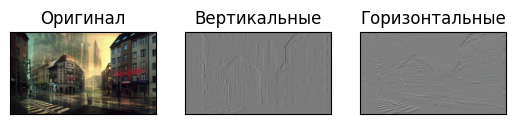

In [322]:
image = img_input('img/art_4.jpg');

# Вычисление вертикальных линий
# cv2.normalize необходимо для избежания предупреждения "Clipping input data to the valid rang..."
sobel_vertical = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
sobel_vertical = cv2.Sobel(sobel_vertical, cv2.CV_64F, 1, 0, ksize=5)
sobel_vertical = cv2.normalize(sobel_vertical, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

# Вычисление горизонтальных линий
sobel_horizontal = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
sobel_horizontal = cv2.Sobel(sobel_horizontal, cv2.CV_64F, 0, 1, ksize=5)
sobel_horizontal = cv2.normalize(sobel_horizontal, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

res = [image, sobel_vertical, sobel_horizontal]
title = ['Оригинал', 'Вертикальные', 'Горизонтальные']

img_print(res, title)

### Задание 6.7 Сравнить оба способа для горизонтального фильтра Собела с преобразованием в cv2.CV_8U и без него.

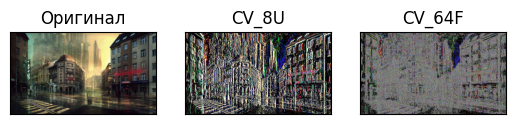

In [323]:
img = img_input('img/art_4.jpg')

# Output dtype = cv2.CV_8U
sobelx8u = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)

# Output dtype = cv2.CV_64F.
sobelx64f = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)

abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)

res = [image ,sobelx8u ,sobel_8u]
title = ['Оригинал', 'CV_8U', 'CV_64F']

img_print(res, title)


### 6.7.3. Обнаружение перепадов (вертикальных и горизонтальных) методом Превитта


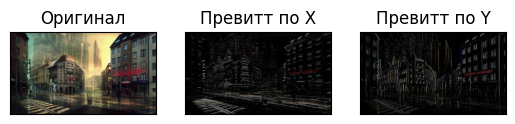

In [324]:
image = img_input('img/art_4.jpg')

# Создаем ядро (маску) для x и y
x_mask = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
y_mask = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])

# Функция соединения изображения с ядром (в данном случае с X, то есть выбраны будут горизонтальные линии), здесь -1 –это глубина изображения (если значение отрицательное, то глубина соответствует исходному изображению, как и cv2.CV_64F)
img_prewittx = cv2.filter2D(image, -1, x_mask)

# Соединение изображения с ядром Y, выбор вертикальных линий
img_prewitty = cv2.filter2D(image, -1, y_mask)

res = [image, img_prewittx, img_prewitty]
title = ['Оригинал', 'Превитт по X', 'Превитт по Y']

img_print(res, title)

### 6.7.4. Выделение границ методом Робертса

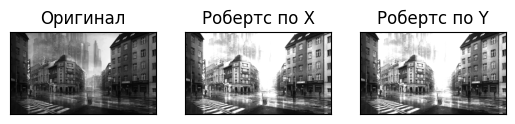

In [325]:
image = img_input('img/art_4.jpg', type=0)

# Создадим маски для ядра X(kernel1) и Y(kernel2)
kernel1 = np.array([[1, 0], [0, 1]])
kernel2 = np.array ([[0, 1],[0, 1]])

# Выделим линии
img_robx = cv2.filter2D(image, -1, kernel1)
img_roby = cv2.filter2D(image, -1, kernel2)

res = [image,img_robx, img_roby]
title = ['Оригинал', 'Робертс по X', 'Робертс по Y']

img_print(res, title, hard_type='gray')

### 6.7.5. Оператор Лапласа

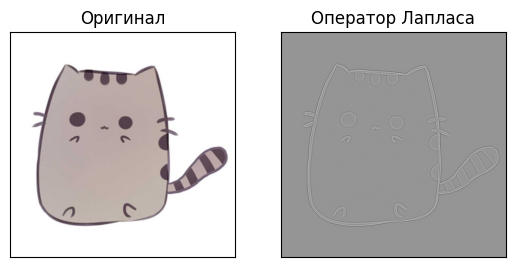

In [326]:
image = img_input('img/art_5.jpg')
#image = image.astype(np.uint16) # изменение типа данных на uint16
laplacian = cv2.Laplacian(image, cv2.CV_64F)
laplacian = cv2.normalize(laplacian, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

res = [image, laplacian]
title = ['Оригинал', 'Оператор Лапласа']

img_print(res, title)